In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-2022-players/fifa22.csv


#  **Introduction**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

os.listdir('/kaggle/input')

# Load the .csv data into a DataFrame
data_df = pd.read_csv("/kaggle/input/fifa-2022-players/fifa22.csv")
# Display the first 5 rows of the dataset
data_df.head(5)

,name,rank,gender,wage_eur,log_wage,position,nationality,club,league,preferred_foot,shooting,passing,dribbling,defending,attacking,skill,movement,power,mentality,goalkeeping
0,Lionel Andrés Messi Cuccittini,93,M,320000.0,12.676076,RW,Argentina,Paris Saint-Germain,French Ligue 1,Left,92.0,91.0,95.0,26.333333,85.8,94.0,90.2,77.8,73.833333,10.8
1,Lucia Roberta Tough Bronze,92,F,NaN,NaN,NaN,England,NaN,NaN,Right,61.0,70.0,81.0,89.000000,69.0,62.2,84.2,78.8,69.166667,12.6
2,Vivianne Miedema,92,F,NaN,NaN,NaN,Netherlands,NaN,NaN,Right,93.0,75.0,88.0,25.000000,86.0,79.0,80.6,84.0,70.833333,15.6
3,Wéndèleine Thérèse Renard,92,F,NaN,NaN,NaN,France,NaN,NaN,Right,70.0,62.0,73.0,91.333333,62.6,67.8,64.0,82.4,73.500000,12.8
4,Robert Lewandowski,92,M,270000.0,12.506177,ST,Poland,FC Bayern München,German 1. Bundesliga,Right,92.0,79.0,86.0,32.000000,86.0,81.4,81.6,84.8,80.666667,10.2


The unit of analysis in this dataset are the football players.

# **Exploratory Data Analysis (EDA)**

In [3]:
print("There are " + str(len(data_df)) + " observations and " + str(len(data_df.columns)) + " features.")

There are 19630 observations and 20 features.


In [4]:
gender = data_df["gender"].value_counts()
male_players = gender["M"]
female_players = gender["F"]

print("Number of male players:", male_players)
print("Number of female players:", female_players)

Number of male players: 19239
Number of female players: 391


In [5]:
# Remove rows with missing values in the "passing" column
data_df = data_df.dropna(subset = ["passing"])
print("Shape of final dataset:", data_df.shape)

Shape of final dataset: (17450, 20)


# **Data Analysis and Interpretation**

In [6]:
import statsmodels.api as smf

# Estimate a multiple regression evaluating the effect on rank of four features: passing, attacking, defending, and skill
x_axis = data_df[["passing", "attacking", "defending", "skill"]]
y_axis = data_df["rank"]
x_axis = smf.add_constant(x_axis)
model = smf.OLS(y_axis, x_axis).fit()

print(model.summary())

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


                            OLS Regression Results                            
Dep. Variable:                   rank   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 1.044e+04
Date:                Thu, 10 Aug 2023   Prob (F-statistic):               0.00
Time:                        07:41:42   Log-Likelihood:                -47856.
No. Observations:               17450   AIC:                         9.572e+04
Df Residuals:                   17445   BIC:                         9.576e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.3278      0.203    124.785      0.0

In [7]:
r_squared = model.rsquared
print("R-squared value:", r_squared)

R-squared value: 0.7052478740013822


We can use the R-squared value to determine how much of the variation in “rank” is explained by our features, “passing,” “attacking,” “defending,” and “skill.” Our R-squared value is 0.705, which means that approximately 70.5% of the variation in rank is explained by our features.

We can check if any of our features are significant at the 1% level by checking their p-values. The independent variables “attacking” and “defending” have p-values of 0.00. This means that they are below 0.01 and are therefore statistically significant.

The coeﬀicient in the regression output tells us the estimated effect of a one-unit increase in the “skill” variable on the rank, while holding the other independent variables constant. The coeﬀicient for “skill” is 0.0066, which means that a one-unit increase in “skill” will increase 0.0066 units in rank. Therefore, if all other variables are held constant, a football player with one more unit of skill is expected to have a 0.0066 higher rank.

# **Model Evaluation and Testing**

In [8]:
# Create an X dataframe with just four features: passing, attacking, defending, and skill
X = data_df[["passing", "attacking", "defending", "skill"]]
# Create a Y dataframe with just the “rank” variable
Y = data_df[["rank"]]

# Display the first five rows of each
print(X.head())
print()
print(Y.head())

   passing  attacking  defending  skill
0     91.0       85.8  26.333333   94.0
1     70.0       69.0  89.000000   62.2
2     75.0       86.0  25.000000   79.0
3     62.0       62.6  91.333333   67.8
4     79.0       86.0  32.000000   81.4

   rank
0    93
1    92
2    92
3    92
4    92


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using train_test_split function
# X and Y are the input features and target variable respectively
# test_size specifies the proportion of data to allocate for testing (25% in this case)
# random_state is used to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 123) 

# Print the first 5 rows of the X_train dataset
print(X_train.head(5))

       passing  attacking  defending  skill
17226     52.0       48.0  59.333333   53.2
13548     48.0       55.0  12.666667   54.0
17874     59.0       46.2  58.000000   57.8
19599     47.0       40.6  46.666667   40.0
15629     49.0       51.8  25.666667   49.6


In [10]:
from sklearn.linear_model import LinearRegression 

lr_model = LinearRegression()
# Fit the linear regression model using the training data
lr_model.fit(X_train, Y_train)

# Display the intercept and coefficients of trained model
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Intercept: [25.16773306]
Coefficients: [[-0.02444506  0.61230756  0.17314968  0.00612364]]


In [11]:
# Use the trained linear regression model (lr_model) to make predictions on the testing data (X_test)
Y_pred = lr_model.predict(X_test)
# Print the predicted values for the first 3 instances in the testing data
print("Predicted values:", Y_pred[:3])

Predicted values: [[64.57617047]
 [72.78035994]
 [70.46341746]]


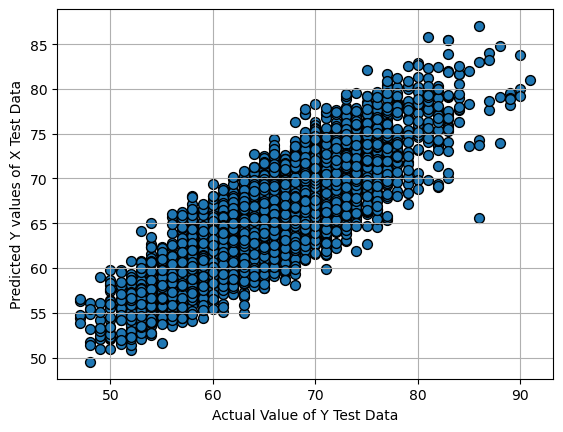

In [12]:
plt.scatter(Y_test, Y_pred, s = 50, edgecolors = "black")
plt.xlabel("Actual Value of Y Test Data")
plt.ylabel("Predicted Y values of X Test Data")
plt.grid()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

# Display the Root Mean Squared Error (RMSE) for this model
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print('RMSE:', rmse)

RMSE: 3.7445626399871976


Overall, the scaterplot of predicted values against actual values shows fairly accurate predictions due to the fairly tight cluster of points around the line of best fit. However, there are still some points that are further away from the line of best fit, which means that the scatterplot is less accurate for those observations. In addition, our overall model only includes four features. Therefore, we may be lacking other variables that could better explain variation in rank.